In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import numpy as np
import pandas as pd

In [2]:
path = "data_campaignA.csv"
dataA = pd.read_csv(path)
dataA.head()

,x_in,y_in,w_in,x_out,y_out,w_out
0,225.05,-225.28,761.33,-64.425,126.59,431.36
1,225.44,-228.20,772.00,-27.468,131.88,477.92
2,225.52,-228.01,766.69,-76.867,117.71,463.07
3,223.59,-225.44,765.47,-52.609,128.82,477.95
4,229.15,-231.84,771.28,-35.997,130.87,466.37


In [3]:
dataA.isnull().sum() 

x_in     0
y_in     0
w_in     0
x_out    0
y_out    0
w_out    0
dtype: int64

In [4]:
data_array_A = dataA.to_numpy()
data_array_A.shape

(330, 6)

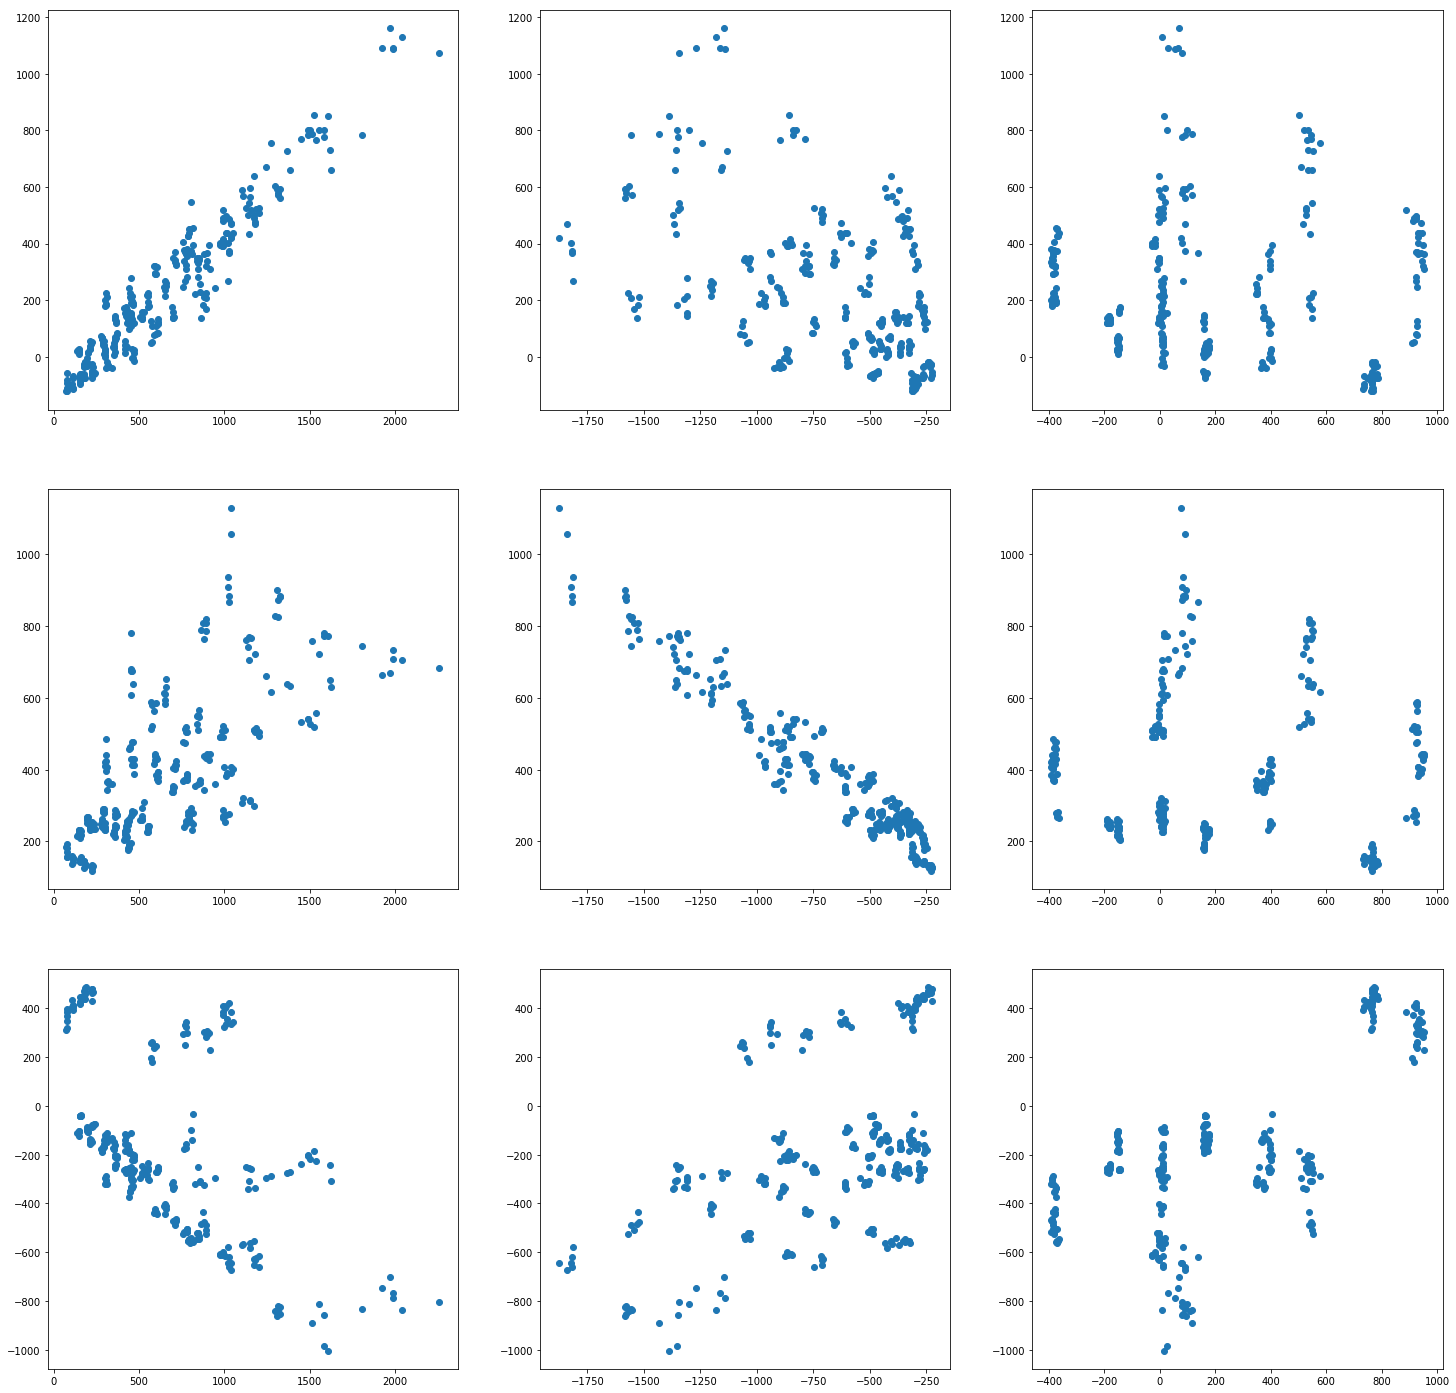

In [5]:
fig = plt.figure(figsize=(25,25))
count = 0
for m in range(3, 6, 1):
    for n in range(0, 3, 1):
        count += 1
        ax = fig.add_subplot(3,3,count)
        
        y = data_array_A[:, m]
        x = data_array_A[:, n]
        plt.scatter(x, y)

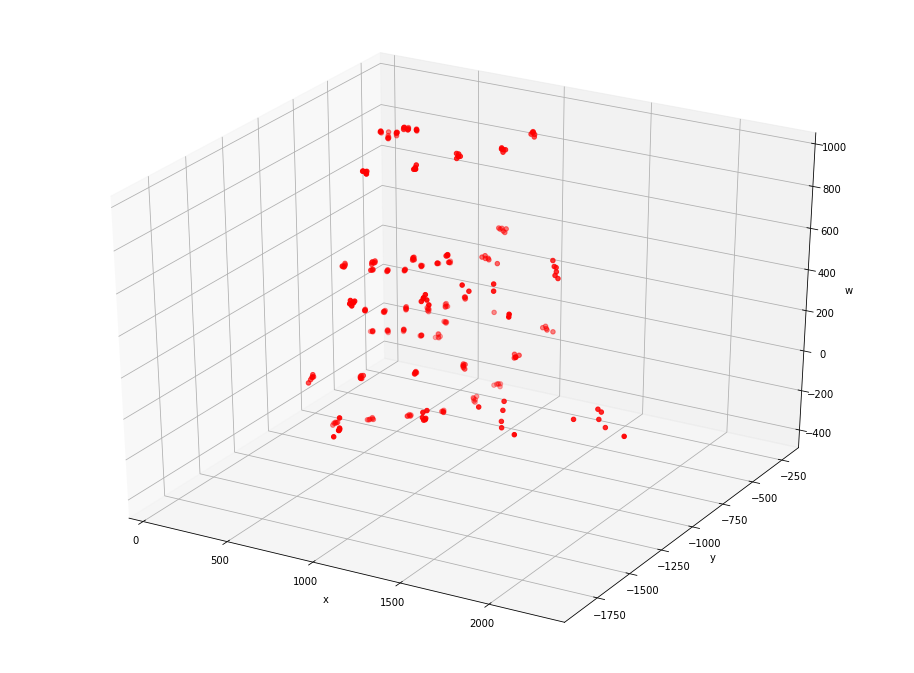

In [6]:
x = data_array_A[:, 0]
y = data_array_A[:, 1]
z = data_array_A[:, 2]
x_out = data_array_A[:, 3]
y_out = data_array_A[:, 4]
z_out = data_array_A[:, 5]

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('w')

plt.show()

Text(0,0.5,'Frequency')

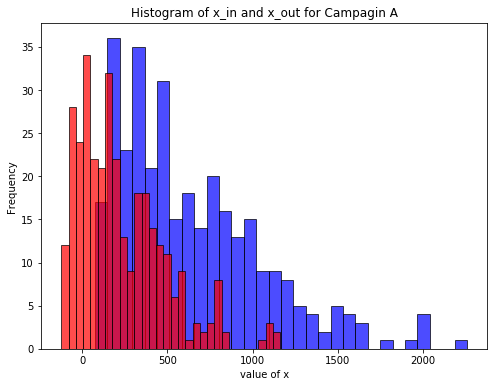

In [7]:
plt.figure(figsize=(8, 6))  
plt.hist(x, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.hist(x_out, bins=30, alpha=0.7, color='red', edgecolor='black')


plt.title('Histogram of x_in and x_out for Campagin A')
plt.xlabel('value of x')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

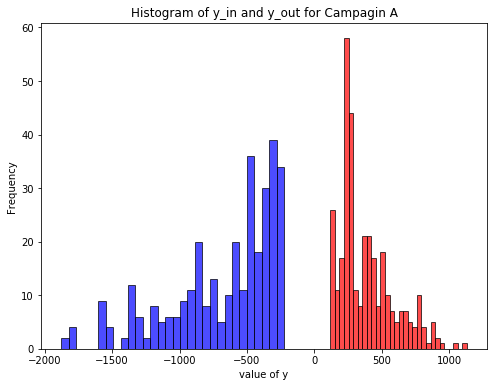

In [8]:
plt.figure(figsize=(8, 6))  
plt.hist(y, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.hist(y_out, bins=30, alpha=0.7, color='red', edgecolor='black')


plt.title('Histogram of y_in and y_out for Campagin A')
plt.xlabel('value of y')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

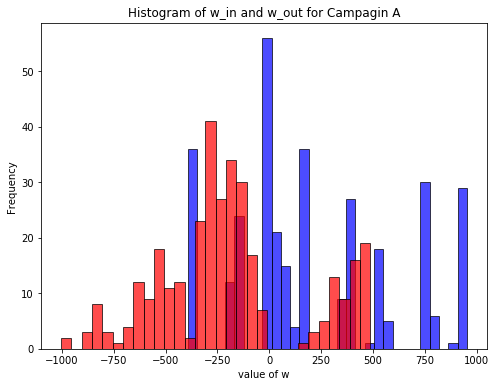

In [9]:
plt.figure(figsize=(8, 6))  
plt.hist(z, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.hist(z_out, bins=30, alpha=0.7, color='red', edgecolor='black')


plt.title('Histogram of w_in and w_out for Campagin A')
plt.xlabel('value of w')
plt.ylabel('Frequency')

## Support Vector Machine for Campain A

In [10]:
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score

In [11]:
svm_data_A = data_array_A
label = []
slipping = []
rolling = []

for v in svm_data_A:
    vp_in = v[0] + v[2]
    vp_out = v[3] + v[5]
    if vp_in >= 0 and vp_out >= 0:
        label.append(1)
        slipping.append(v)
    elif vp_in < 0 and vp_out < 0:
        label.append(1)
        slipping.append(v)
    else:
        label.append(-1)
        rolling.append(v)

label = np.array(label)
slipping = np.array(slipping)
rolling = np.array(rolling)

print("slipping shape", slipping.shape)
print("rolling shape", rolling.shape)
print("label shape", label.shape)

slipping shape (115, 6)
rolling shape (215, 6)
label shape (330,)


In [12]:
X = svm_data_A[:, 0:3]
Y = label

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

print("X train shape:", X_train.shape)
print("Y train shape:", Y_train.shape)

X train shape: (264, 3)
Y train shape: (264,)


In [13]:
from sklearn.svm import SVC
svm_x = SVC(kernel='linear')  
svm_x.fit(X_train,Y_train)

SVC(kernel='linear')

In [14]:
print("Dual Coefficients:", svm_x.coef_)
print("Intercept:", svm_x.intercept_)

wx = svm_x.coef_[0][0]
wy = svm_x.coef_[0][1]
ww = svm_x.coef_[0][2]
b = svm_x.intercept_[0]

Dual Coefficients: [[0.00150998 0.00173824 0.00383165]]
Intercept: [-1.51975787]


In [15]:
Y_pred = svm_x.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

Accuracy: 0.8939393939393939
Classification Report:
               precision    recall  f1-score   support

          -1       0.85      1.00      0.92        41
           1       1.00      0.72      0.84        25

    accuracy                           0.89        66
   macro avg       0.93      0.86      0.88        66
weighted avg       0.91      0.89      0.89        66

Confusion Matrix:
 [[41  0]
 [ 7 18]]


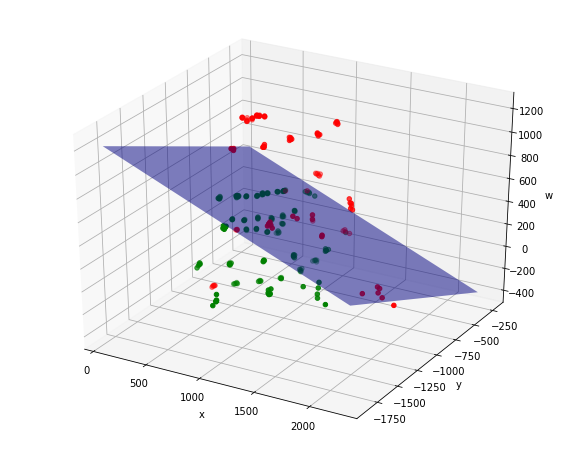

In [16]:
# 3D figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 3D Scatter
ax.scatter(slipping[:, 0], slipping[:, 1], slipping[:, 2], c='r', marker='o', label='Data points')
ax.scatter(rolling[:, 0], rolling[:, 1], rolling[:, 2], c='g', marker='o', label='Data points')

# supper plane
x_range = np.linspace(svm_data_A[:, 0].min(),svm_data_A[:, 0].max(), 10)
y_range = np.linspace(svm_data_A[:, 1].min(), svm_data_A[:, 1].max(), 10)
x_grid, y_grid = np.meshgrid(x_range, y_range)
z_grid = -1/ww * (wx*x_grid + wy*y_grid + b)

ax.plot_surface(x_grid, y_grid, z_grid, alpha=0.5, rstride=100, cstride=100, color='b', label='Fitted plane')

# label
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('w')

plt.show()

## Linear Regression for Campain A  with rolling using Hold Out

In [17]:
X_A = rolling[:, 0:3]
Y_A = rolling[:, 3:6]

X_train, X_test, Y_train, Y_test = train_test_split(X_A, Y_A, test_size=0.2)

print("X train shape:", X_train.shape)
print("Y train shape:", Y_train.shape)

X train shape: (172, 3)
Y train shape: (172, 3)


In [18]:
model_A = LinearRegression()

model_A.fit(X_train, Y_train)

LinearRegression()

In [19]:
print("Coefficients of Model A:", model_A.coef_)
print("Intercept of Model A:", model_A.intercept_)

Coefficients of Model A: [[ 0.54638479 -0.00289873 -0.27692648]
 [ 0.13350083 -0.40732891 -0.04795879]
 [-0.52077228  0.10344485  0.24156306]]
Intercept of Model A: [-121.66739373   28.75618613   38.71738553]


In [20]:
Y_pred = model_A.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error of model A by Linear Regerssion:", mse)
print("R^2 Score of model A by Linear Regerssion:", r2)

Mean Squared Error of model A by Linear Regerssion: 1132.1081611330646
R^2 Score of model A by Linear Regerssion: 0.971259002186969


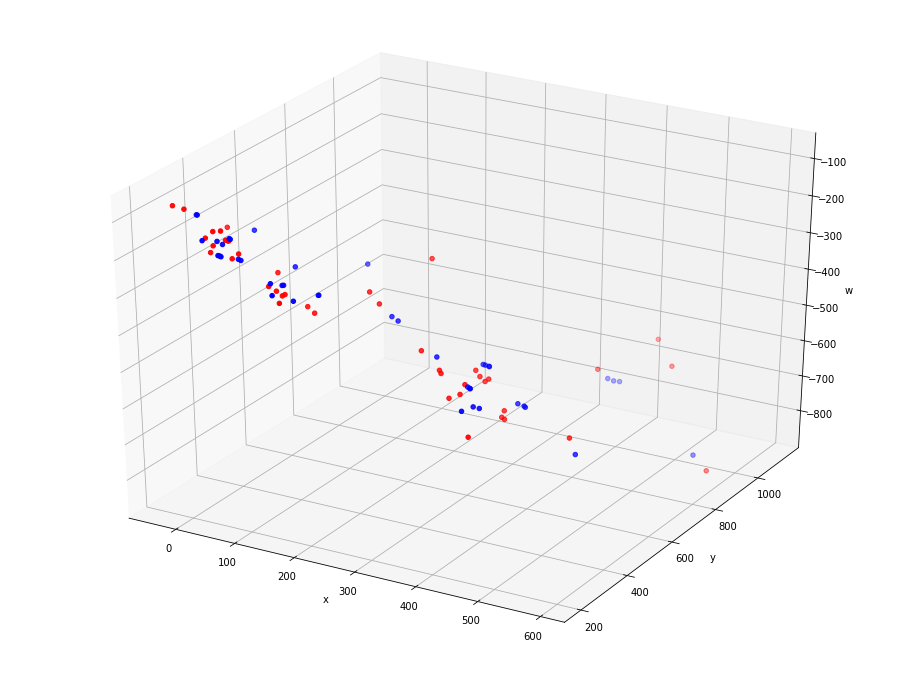

In [21]:
x = Y_test[:, 0]
y = Y_test[:, 1]
z = Y_test[:, 2]
x_pre = Y_pred[:, 0]
y_pre = Y_pred[:, 1]
z_pre = Y_pred[:, 2]

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c='r', marker='o')
ax.scatter(x_pre, y_pre, z_pre, c='b', marker='o')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('w')

plt.show()

## Linear Regression for Campain A  with slipping using Hold Out

In [22]:
X_A = slipping[:, 0:3]
Y_A = slipping[:, 3:6]

X_train, X_test, Y_train, Y_test = train_test_split(X_A, Y_A, test_size=0.2)

print("X train shape:", X_train.shape)
print("Y train shape:", Y_train.shape)

X train shape: (92, 3)
Y train shape: (92, 3)


In [23]:
model_A = LinearRegression()

model_A.fit(X_train, Y_train)

LinearRegression()

In [24]:
print("Coefficients of Model A:", model_A.coef_)
print("Intercept of Model A:", model_A.intercept_)

Coefficients of Model A: [[ 0.62026862  0.04897358 -0.12857934]
 [ 0.09661144 -0.42819517  0.02068861]
 [-0.34946757  0.13421428  0.65430424]]
Intercept of Model A: [-49.14109827   7.14041471  44.48907734]


In [25]:
Y_pred = model_A.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error of model A by Linear Regerssion:", mse)
print("R^2 Score of model A by Linear Regerssion:", r2)

Mean Squared Error of model A by Linear Regerssion: 4847.8006179621325
R^2 Score of model A by Linear Regerssion: 0.9539077268789273


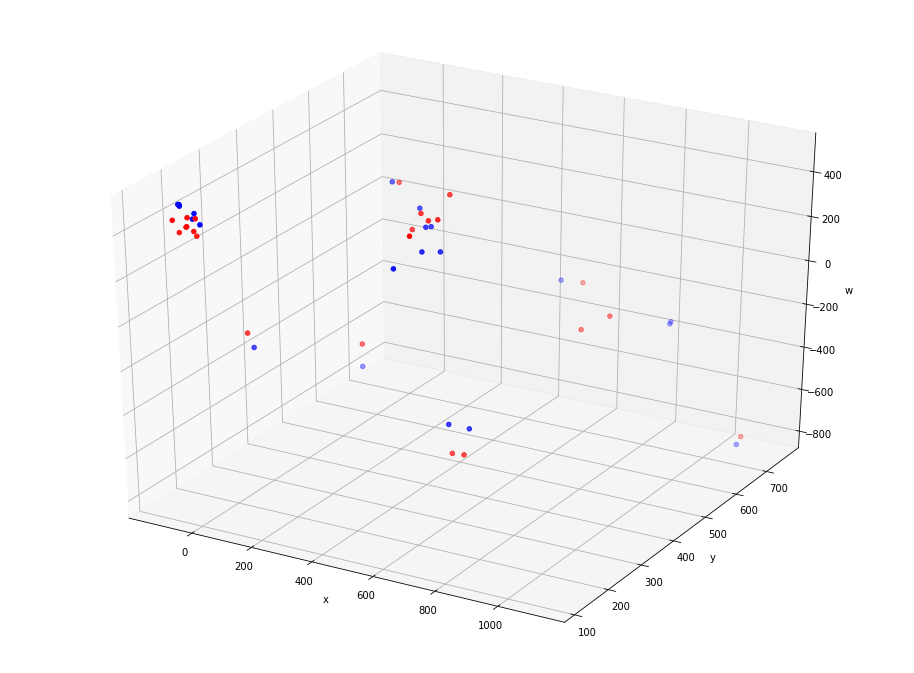

In [26]:
x = Y_test[:, 0]
y = Y_test[:, 1]
z = Y_test[:, 2]
x_pre = Y_pred[:, 0]
y_pre = Y_pred[:, 1]
z_pre = Y_pred[:, 2]

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c='r', marker='o')
ax.scatter(x_pre, y_pre, z_pre, c='b', marker='o')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('w')

plt.show()

## Polynomial fitting for Campain A  with rolling using Hold Out

In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [28]:
X_A = rolling[:, 0:3]
Y_A = rolling[:, 3:6]

X_train, X_test, Y_train, Y_test = train_test_split(X_A, Y_A, test_size=0.2)

print("X train shape:", X_train.shape)
print("Y train shape:", Y_train.shape)

X train shape: (172, 3)
Y train shape: (172, 3)


In [29]:
degree = 3  
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
model_poly_A = make_pipeline(poly_features, LinearRegression())

In [30]:
model_poly_A.fit(X_train, Y_train)

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('linearregression', LinearRegression())])

In [31]:
linear_regression_model = model_poly_A.named_steps['linearregression']
coefficients = linear_regression_model.coef_  
intercept = linear_regression_model.intercept_  

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[ 1.58184798e-01  7.60849328e-01 -9.98593841e-01  2.73430378e-04
  -2.33535040e-04  1.17729217e-03  7.49833698e-04 -1.78988836e-03
  -1.33180877e-03 -4.69626416e-08  8.90435318e-09 -6.78638626e-07
  -1.62815046e-07  2.38922496e-07  9.11191589e-07  1.73645488e-07
  -9.73237898e-07 -1.19051285e-06 -2.60817181e-06]
 [-1.32120418e-01 -9.61780731e-02 -3.00290042e-01  3.63930533e-04
  -2.57271571e-04  2.56485681e-04  5.70775821e-05 -7.35207349e-04
  -9.79195407e-04 -3.65188080e-07 -5.43670054e-07 -2.49720786e-07
  -6.08412724e-07  1.73217987e-08  4.90138686e-07 -2.01284290e-07
  -6.18184433e-07 -1.02269158e-06 -2.01761081e-08]
 [-2.24058955e-01 -2.59930046e-01  6.20723132e-01 -4.16355012e-04
   1.13021705e-04 -7.84895413e-04 -3.18073047e-04  6.65659767e-04
   4.30875106e-04  3.14052300e-07  2.48963206e-07  1.18760870e-06
   1.34126844e-07  6.22473516e-07 -3.99299521e-08 -8.74061714e-08
   6.46219023e-07  5.68365722e-07  7.27767371e-08]]
Intercept: [ 162.05559806  175.00058789 

In [32]:
Y_pred_poly = model_poly_A.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred_poly)
r2 = r2_score(Y_test, Y_pred_poly)

print("Mean Squared Error of model A by Polynomial fitting:", mse)
print("R^2 Score of model A by Polynomial fitting:", r2)

Mean Squared Error of model A by Polynomial fitting: 640.868807575972
R^2 Score of model A by Polynomial fitting: 0.9811100050778726


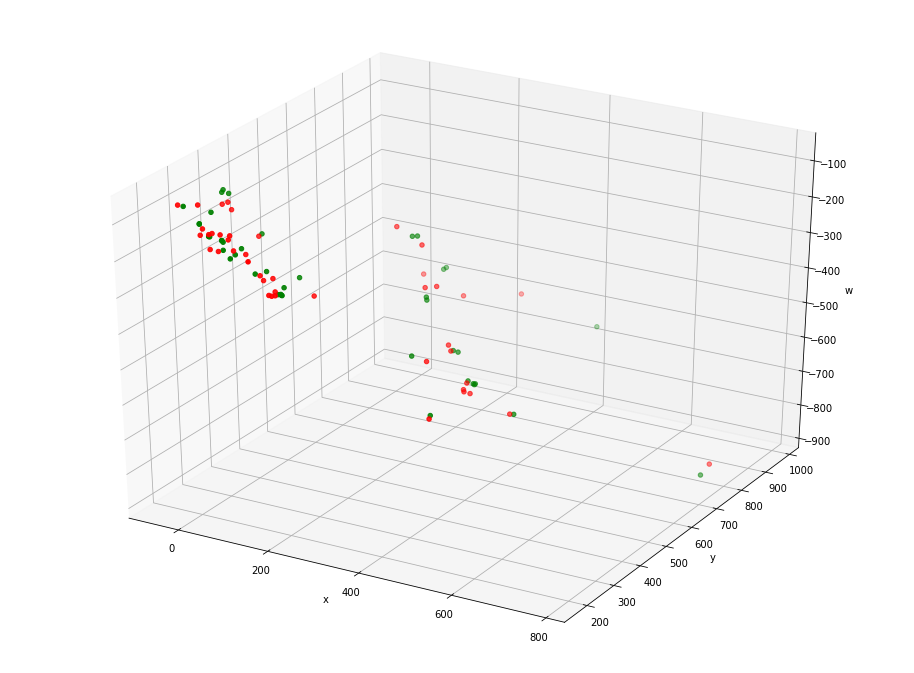

In [33]:
x = Y_test[:, 0]
y = Y_test[:, 1]
z = Y_test[:, 2]
x_pre_poly = Y_pred_poly[:, 0]
y_pre_poly = Y_pred_poly[:, 1]
z_pre_poly = Y_pred_poly[:, 2]

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c='r', marker='o')
ax.scatter(x_pre_poly, y_pre_poly, z_pre_poly, c='g', marker='o')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('w')

plt.show()

## Polynomial fitting for Campain A  with slipping using Hold Out

In [34]:
X_A = slipping[:, 0:3]
Y_A = slipping[:, 3:6]

X_train, X_test, Y_train, Y_test = train_test_split(X_A, Y_A, test_size=0.2)

print("X train shape:", X_train.shape)
print("Y train shape:", Y_train.shape)

X train shape: (92, 3)
Y train shape: (92, 3)


In [35]:
degree = 3  
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
model_poly_A = make_pipeline(poly_features, LinearRegression())

In [36]:
model_poly_A.fit(X_train, Y_train)

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('linearregression', LinearRegression())])

In [37]:
linear_regression_model = model_poly_A.named_steps['linearregression']
coefficients = linear_regression_model.coef_  
intercept = linear_regression_model.intercept_  

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[-2.63825574e-01  2.26745424e+00 -3.33059086e-01  8.31137905e-04
   3.28534171e-05  6.17043730e-04  3.27151956e-03 -5.92273381e-04
  -2.47682157e-04  3.19323760e-07  2.07540808e-06 -8.62803255e-08
   2.38443980e-06  2.14373073e-07 -2.24313271e-07  2.05627682e-06
  -8.17838825e-07 -4.44697419e-07  9.15412199e-08]
 [-1.07969987e-01 -4.45788200e-01  4.11467542e-01  1.76172571e-04
   2.86542992e-06  1.25587446e-05  3.00965009e-04  2.12830104e-05
  -8.64989951e-04 -2.03193798e-08 -8.44076512e-08 -2.01283651e-07
  -4.20994783e-07 -2.61885986e-07  2.51153113e-07 -9.96873856e-08
  -1.49948041e-07  1.74738802e-07  4.11822472e-07]
 [-6.34331485e-01  3.25604626e-01  5.32466170e-01 -8.37758993e-04
  -2.50235767e-03  4.38189564e-04 -1.04939630e-03  2.20204065e-03
   1.48399170e-04  6.23858058e-07  1.66394103e-06  6.70129509e-07
   9.71145091e-07  9.55840041e-07 -5.54000498e-07  1.60117871e-07
   1.24940822e-06 -1.16901064e-06  3.59802694e-07]]
Intercept: [522.98498754  35.2781039  17

In [38]:
Y_pred_poly = model_poly_A.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred_poly)
r2 = r2_score(Y_test, Y_pred_poly)

print("Mean Squared Error of model A by Polynomial fitting:", mse)
print("R^2 Score of model A by Polynomial fitting:", r2)

Mean Squared Error of model A by Polynomial fitting: 2547.4910064211795
R^2 Score of model A by Polynomial fitting: 0.9740851198363335


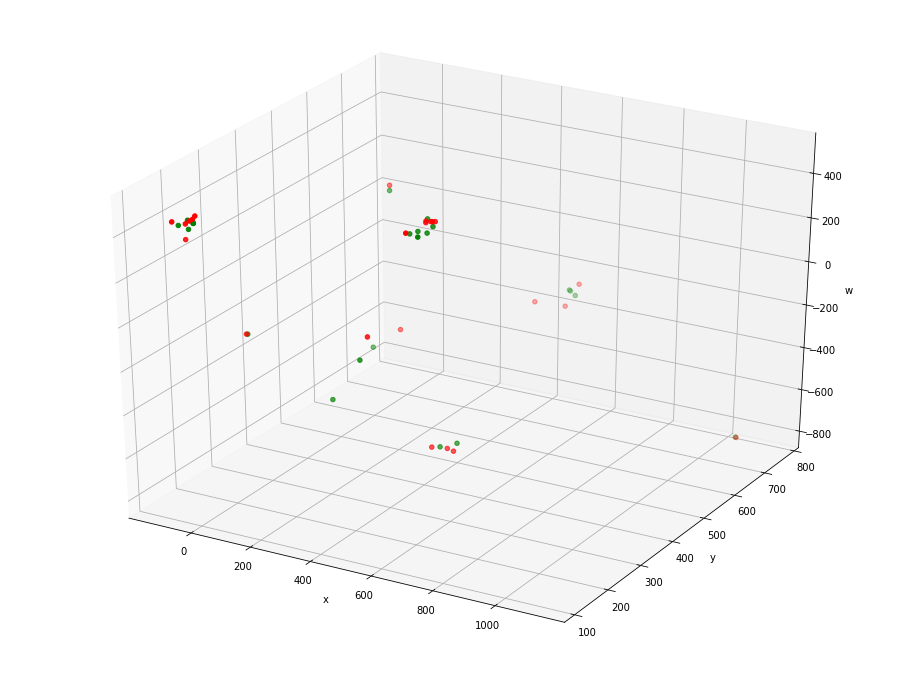

In [39]:
x = Y_test[:, 0]
y = Y_test[:, 1]
z = Y_test[:, 2]
x_pre_poly = Y_pred_poly[:, 0]
y_pre_poly = Y_pred_poly[:, 1]
z_pre_poly = Y_pred_poly[:, 2]

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c='r', marker='o')
ax.scatter(x_pre_poly, y_pre_poly, z_pre_poly, c='g', marker='o')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('w')

plt.show()

## Observation for Campain B

In [40]:
path = "data_campaignB.csv"
dataB = pd.read_csv(path)
dataB.head()

,x_in,y_in,w_in,x_out,y_out,w_out
0,1407.90,-562.34,149.58,765.78,309.35,-598.72
1,1085.50,-436.49,149.76,520.54,250.98,-641.18
2,997.00,-392.72,141.68,514.86,260.00,-587.92
3,1059.20,-457.04,144.41,551.76,255.81,-588.71
4,918.99,-424.26,122.81,503.66,227.69,-636.33


In [41]:
dataB.isnull().sum() 

x_in     0
y_in     0
w_in     0
x_out    0
y_out    0
w_out    0
dtype: int64

In [42]:
data_array_B = dataB.to_numpy()
data_array_B.shape

(693, 6)

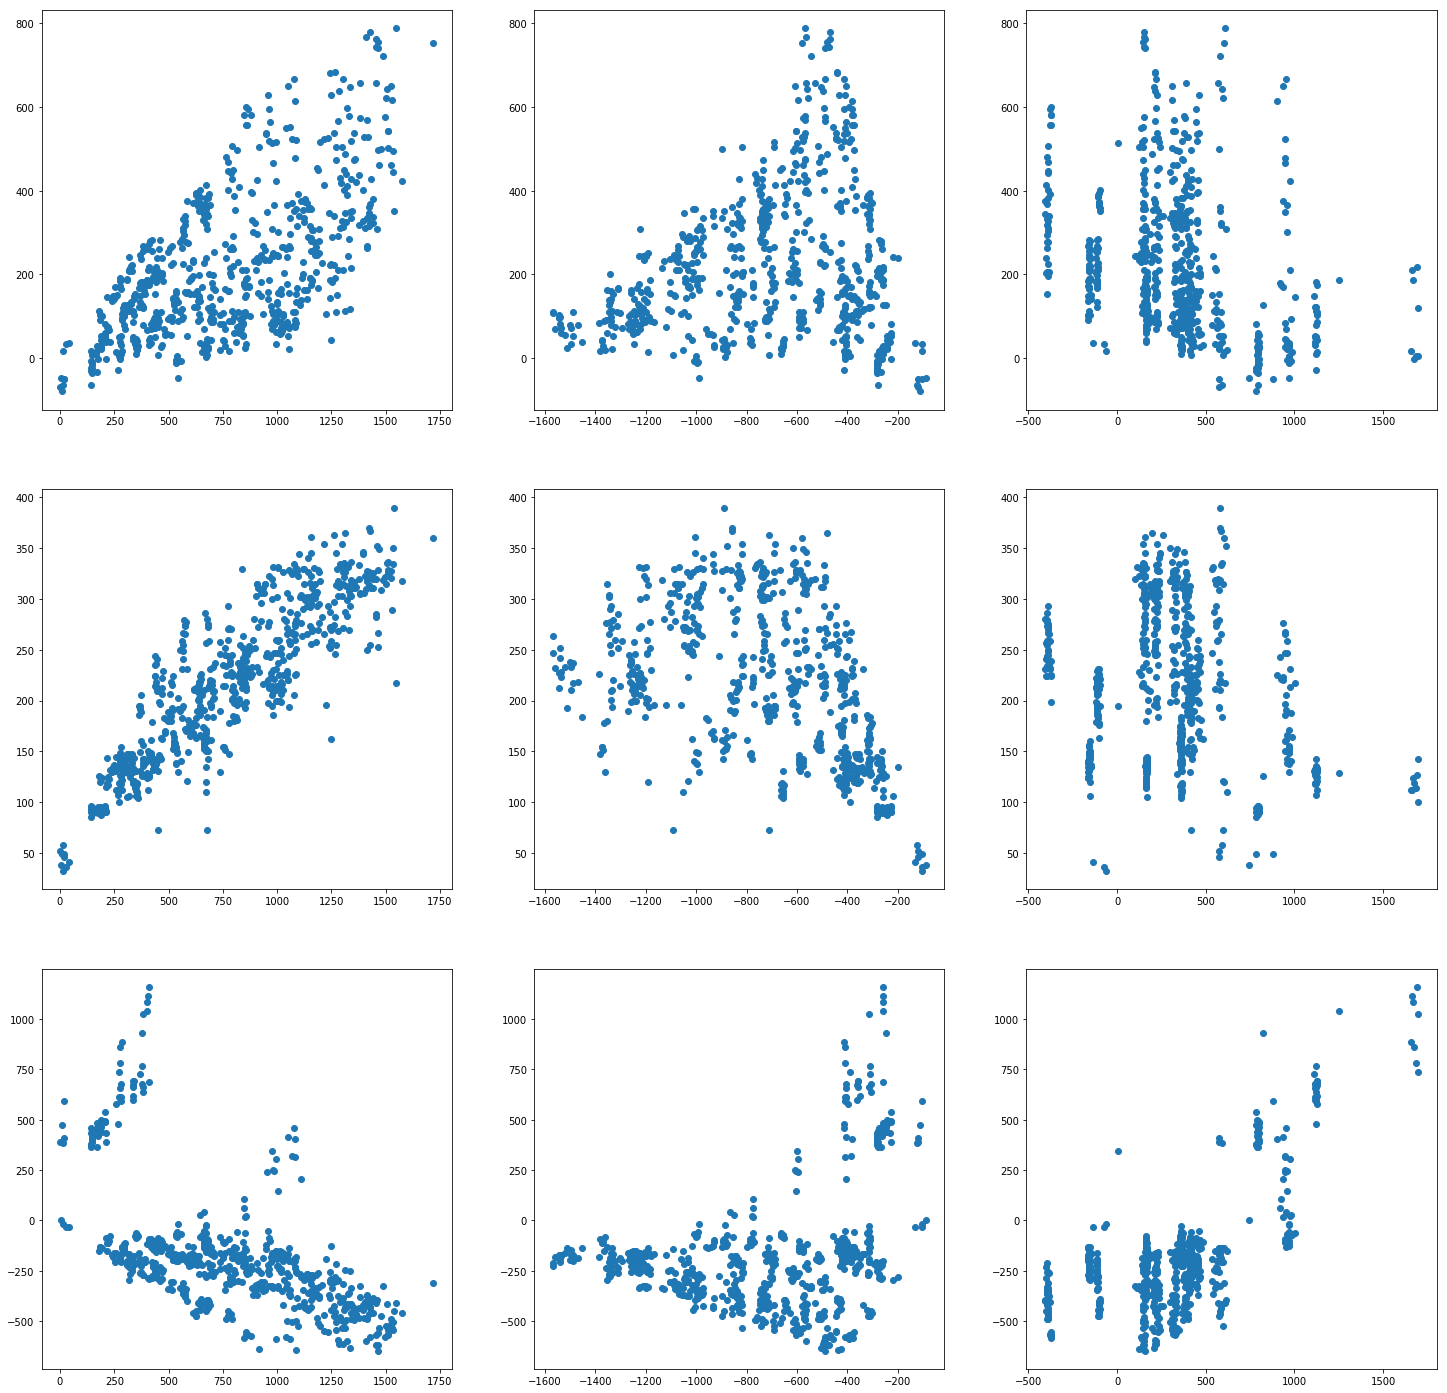

In [43]:
fig = plt.figure(figsize=(25,25))
count = 0
for m in range(3, 6, 1):
    for n in range(0, 3, 1):
        count += 1
        ax = fig.add_subplot(3,3,count)
        
        y = data_array_B[:, m]
        x = data_array_B[:, n]
        plt.scatter(x, y)

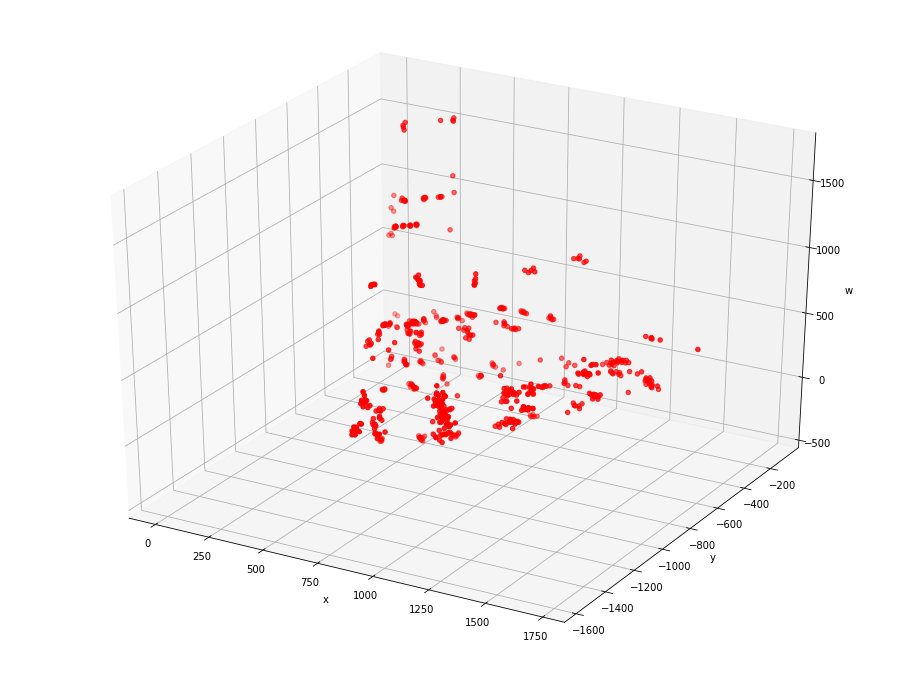

In [44]:
x = data_array_B[:, 0]
y = data_array_B[:, 1]
z = data_array_B[:, 2]
x_out = data_array_B[:, 3]
y_out = data_array_B[:, 4]
z_out = data_array_B[:, 5]

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('w')

plt.show()

Text(0,0.5,'Frequency')

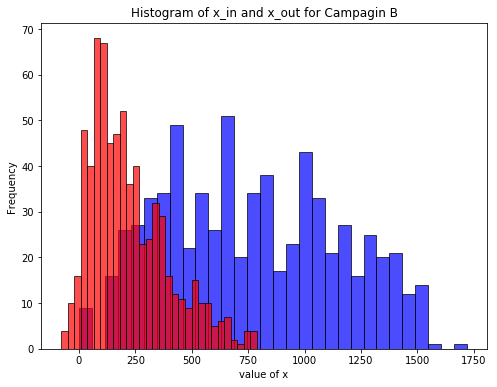

In [45]:
plt.figure(figsize=(8, 6))  
plt.hist(x, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.hist(x_out, bins=30, alpha=0.7, color='red', edgecolor='black')


plt.title('Histogram of x_in and x_out for Campagin B')
plt.xlabel('value of x')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

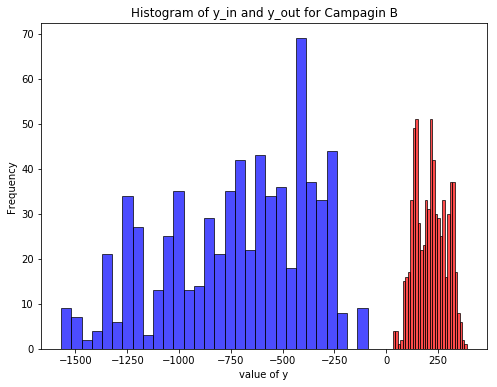

In [46]:
plt.figure(figsize=(8, 6))  
plt.hist(y, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.hist(y_out, bins=30, alpha=0.7, color='red', edgecolor='black')


plt.title('Histogram of y_in and y_out for Campagin B')
plt.xlabel('value of y')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

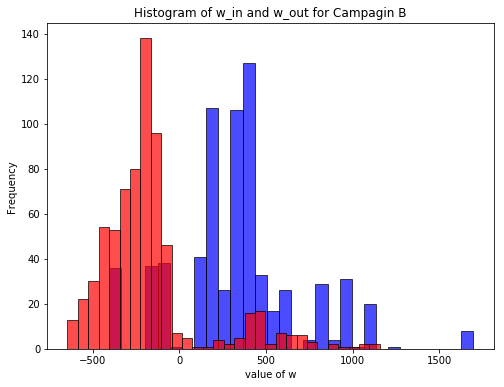

In [47]:
plt.figure(figsize=(8, 6))  
plt.hist(z, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.hist(z_out, bins=30, alpha=0.7, color='red', edgecolor='black')


plt.title('Histogram of w_in and w_out for Campagin B')
plt.xlabel('value of w')
plt.ylabel('Frequency')

## Support Vector Machine for Campain B

In [48]:
svm_data_B = data_array_B
label = []
slipping = []
rolling = []

for v in svm_data_B:
    vp_in = v[0] + v[2]
    vp_out = v[3] + v[5]
    if vp_in >= 0 and vp_out >= 0:
        label.append(1)
        slipping.append(v)
    elif vp_in < 0 and vp_out < 0:
        label.append(1)
        slipping.append(v)
    else:
        label.append(-1)
        rolling.append(v)

label = np.array(label)
slipping = np.array(slipping)
rolling = np.array(rolling)

print("slipping shape", slipping.shape)
print("rolling shape", rolling.shape)
print("label shape", label.shape)

slipping shape (154, 6)
rolling shape (539, 6)
label shape (693,)


In [49]:
X = svm_data_B[:, 0:3]
Y = label

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

print("X train shape:", X_train.shape)
print("Y train shape:", Y_train.shape)

X train shape: (554, 3)
Y train shape: (554,)


In [50]:
svm_x = SVC(kernel='linear')  
svm_x.fit(X_train,Y_train)

SVC(kernel='linear')

In [51]:
print("Dual Coefficients:", svm_x.coef_)
print("Intercept:", svm_x.intercept_)

wx = svm_x.coef_[0][0]
wy = svm_x.coef_[0][1]
ww = svm_x.coef_[0][2]
b = svm_x.intercept_[0]

Dual Coefficients: [[0.00345783 0.01263517 0.00738565]]
Intercept: [0.24167289]


In [52]:
Y_pred = svm_x.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

Accuracy: 0.9424460431654677
Classification Report:
               precision    recall  f1-score   support

          -1       0.97      0.97      0.97       117
           1       0.82      0.82      0.82        22

    accuracy                           0.94       139
   macro avg       0.89      0.89      0.89       139
weighted avg       0.94      0.94      0.94       139

Confusion Matrix:
 [[113   4]
 [  4  18]]


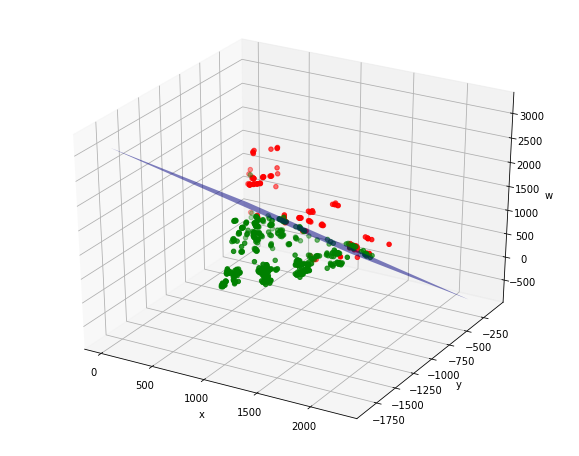

In [53]:
# 3D figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 3D Scatter
ax.scatter(slipping[:, 0], slipping[:, 1], slipping[:, 2], c='r', marker='o', label='Data points')
ax.scatter(rolling[:, 0], rolling[:, 1], rolling[:, 2], c='g', marker='o', label='Data points')

# supper plane
x_range = np.linspace(svm_data_A[:, 0].min(),svm_data_A[:, 0].max(), 10)
y_range = np.linspace(svm_data_A[:, 1].min(), svm_data_A[:, 1].max(), 10)
x_grid, y_grid = np.meshgrid(x_range, y_range)
z_grid = -1/ww * (wx*x_grid + wy*y_grid + b)

ax.plot_surface(x_grid, y_grid, z_grid, alpha=0.5, rstride=100, cstride=100, color='b', label='Fitted plane')

# label
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('w')

plt.show()

## Linear Regression for Campain B  with rolling situation using Hold Out

In [54]:
X_B = rolling[:, 0:3]
Y_B = rolling[:, 3:6]

X_train, X_test, Y_train, Y_test = train_test_split(X_B, Y_B, test_size=0.2)

print("X train shape:", X_train.shape)
print("Y train shape:", Y_train.shape)

X train shape: (431, 3)
Y train shape: (431, 3)


In [55]:
model_B = LinearRegression()

model_B.fit(X_train, Y_train)

LinearRegression()

In [56]:
print("Coefficients of Model B:", model_B.coef_)
print("Intercept of Model B:", model_B.intercept_)

Coefficients of Model B: [[ 0.34659368  0.21670125 -0.22058557]
 [ 0.18869386 -0.01285602 -0.0856502 ]
 [-0.35809325 -0.16408241  0.20387038]]
Intercept of Model B: [ 154.79442482   85.38927715 -164.27869023]


In [57]:
Y_pred = model_B.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error of model B by Linear regression:", mse)
print("R^2 Score of model B by Linear regression:", r2)

Mean Squared Error of model B by Linear regression: 2403.4253317851526
R^2 Score of model B by Linear regression: 0.7883463659574778


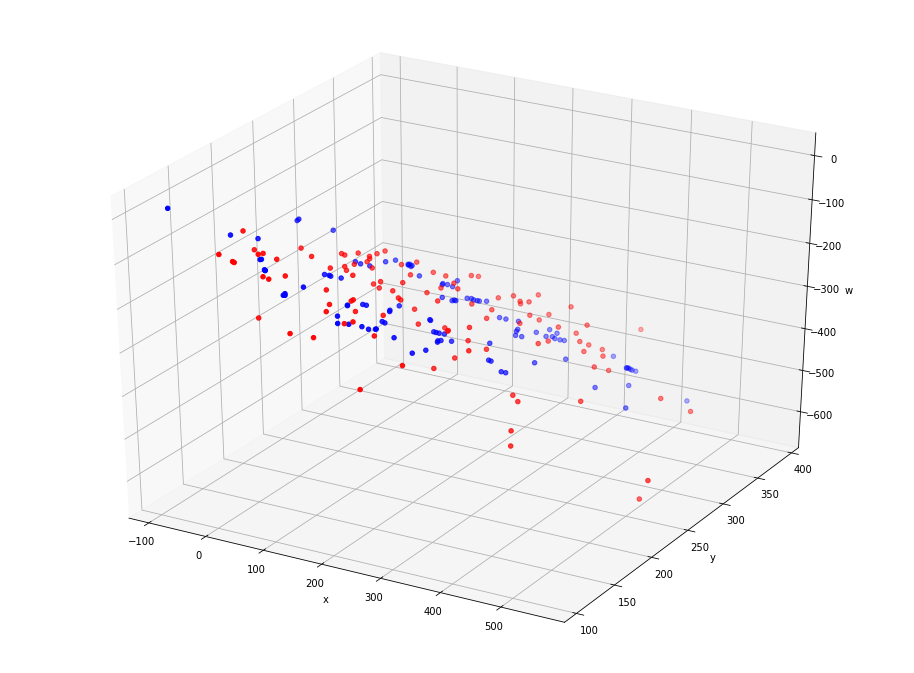

In [58]:
x = Y_test[:, 0]
y = Y_test[:, 1]
z = Y_test[:, 2]
x_pre = Y_pred[:, 0]
y_pre = Y_pred[:, 1]
z_pre = Y_pred[:, 2]

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c='r', marker='o')
ax.scatter(x_pre, y_pre, z_pre, c='b', marker='o')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('w')

plt.show()

## Linear Regression for Campain B  with slipping situation using Hold Out

In [59]:
X_B = slipping[:, 0:3]
Y_B = slipping[:, 3:6]

X_train, X_test, Y_train, Y_test = train_test_split(X_B, Y_B, test_size=0.2)

print("X train shape:", X_train.shape)
print("Y train shape:", Y_train.shape)

X train shape: (123, 3)
Y train shape: (123, 3)


In [60]:
model_B = LinearRegression()

model_B.fit(X_train, Y_train)

LinearRegression()

In [61]:
print("Coefficients of Model B:", model_B.coef_)
print("Intercept of Model B:", model_B.intercept_)

Coefficients of Model B: [[ 5.81804380e-01  4.19439425e-01 -8.77482708e-02]
 [ 1.50443467e-01 -5.66726834e-02 -1.55164166e-04]
 [-3.45984922e-01  5.08095263e-01  7.04880275e-01]]
Intercept of Model B: [117.06633313  52.70592814  86.4571496 ]


In [62]:
Y_pred = model_B.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error of model B by Linear regression:", mse)
print("R^2 Score of model B by Linear regression:", r2)

Mean Squared Error of model B by Linear regression: 9128.614636174867
R^2 Score of model B by Linear regression: 0.9364911073508061


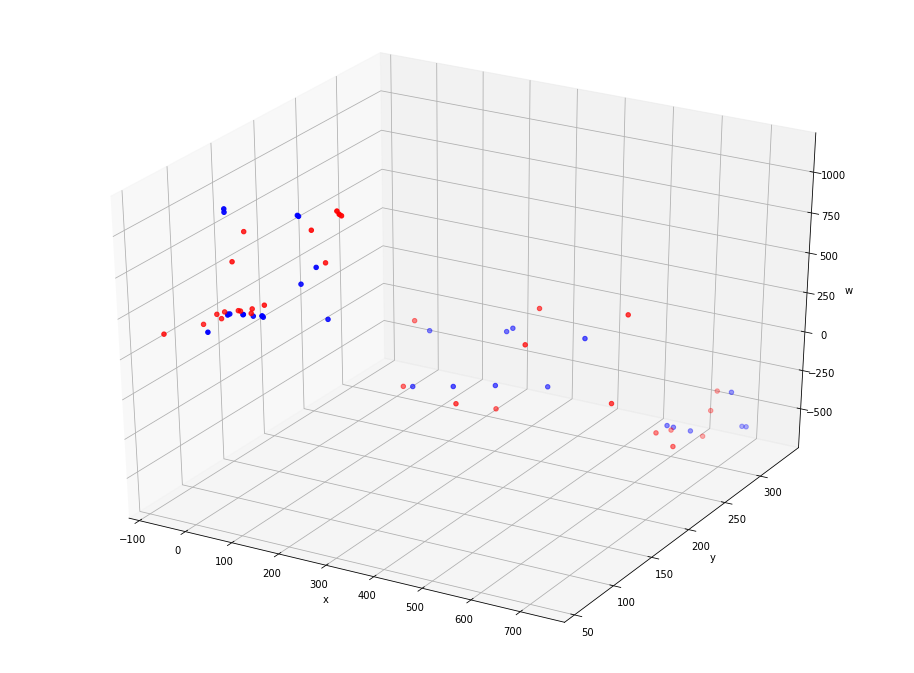

In [63]:
x = Y_test[:, 0]
y = Y_test[:, 1]
z = Y_test[:, 2]
x_pre = Y_pred[:, 0]
y_pre = Y_pred[:, 1]
z_pre = Y_pred[:, 2]

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c='r', marker='o')
ax.scatter(x_pre, y_pre, z_pre, c='b', marker='o')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('w')

plt.show()

## Polynomial fitting for Campain B with rolling using Hold Out

In [64]:
X_B = rolling[:, 0:3]
Y_B = rolling[:, 3:6]

X_train, X_test, Y_train, Y_test = train_test_split(X_B, Y_B, test_size=0.2)

print("X train shape:", X_train.shape)
print("Y train shape:", Y_train.shape)

X train shape: (431, 3)
Y train shape: (431, 3)


In [65]:
degree = 3  
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
model_poly_B = make_pipeline(poly_features, LinearRegression())

In [66]:
model_poly_B.fit(X_train, Y_train)

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('linearregression', LinearRegression())])

In [67]:
linear_regression_model = model_poly_B.named_steps['linearregression']
coefficients = linear_regression_model.coef_  
intercept = linear_regression_model.intercept_  

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[ 4.50058026e-01 -1.40727908e-01 -1.04278871e-01  4.83804311e-04
   3.21156440e-04 -6.57633807e-04 -3.08136510e-04 -1.54645846e-04
  -1.85811418e-04 -2.44608538e-07  1.62570854e-07  4.93828771e-07
   1.31839922e-07  1.57676979e-07  2.10816143e-08 -1.19388221e-07
   1.41757062e-08 -6.51899248e-08  1.91226657e-07]
 [-5.83142347e-03 -5.41209268e-01  1.21155877e-01  1.21677919e-04
  -5.12429947e-04 -3.51636900e-04 -7.72368824e-04  1.88254638e-04
  -2.58884860e-04 -5.92066730e-08  2.08236308e-07  3.32221319e-07
  -3.87289912e-08  1.74966596e-07  7.23371769e-08 -2.48993491e-07
   9.45680211e-08 -1.61977961e-07  1.36395670e-07]
 [-5.15396787e-01  1.42434902e-01 -2.88039020e-02 -3.81374734e-04
  -1.74839548e-06  1.05769660e-03  3.89936465e-04  1.63323908e-04
   3.68756685e-04  2.49185966e-07 -1.86569866e-07 -7.11765577e-07
   4.12399270e-08  7.20617645e-08  1.50837011e-07  1.86785719e-07
   1.05574143e-07  3.46389542e-07 -2.20404308e-07]]
Intercept: [  0.37544489 -19.95801436  -

In [68]:
Y_pred_poly = model_poly_B.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred_poly)
r2 = r2_score(Y_test, Y_pred_poly)

print("Mean Squared Error of model B by polynomial fitting:", mse)
print("R^2 Score of model B by polynomial fitting:", r2)

Mean Squared Error of model B by polynomial fitting: 1703.4368303798667
R^2 Score of model B by polynomial fitting: 0.8757461280021404


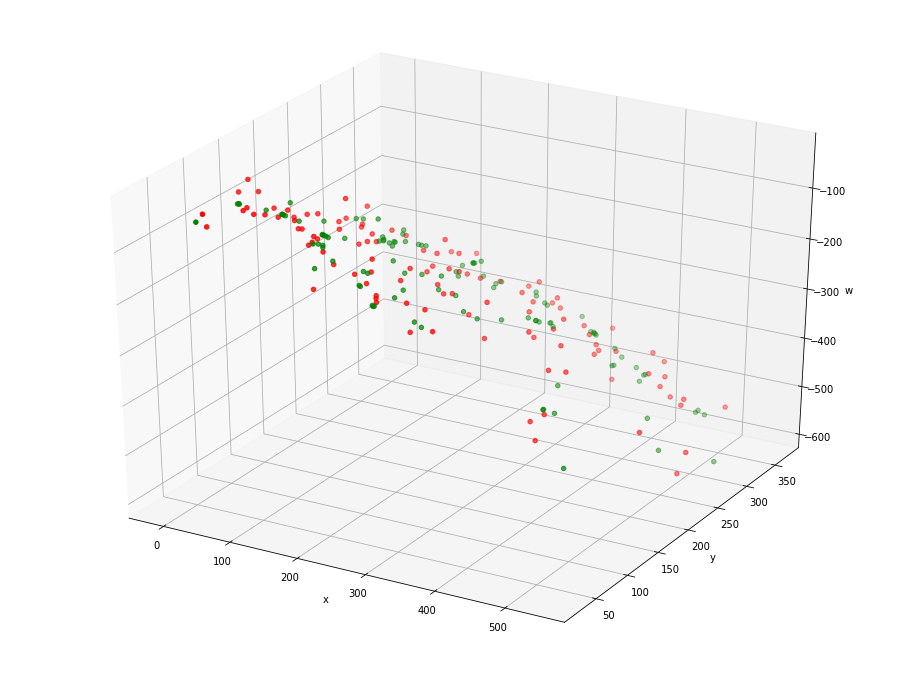

In [69]:
x = Y_test[:, 0]
y = Y_test[:, 1]
z = Y_test[:, 2]
x_pre_poly = Y_pred_poly[:, 0]
y_pre_poly = Y_pred_poly[:, 1]
z_pre_poly = Y_pred_poly[:, 2]

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c='r', marker='o')
ax.scatter(x_pre_poly, y_pre_poly, z_pre_poly, c='g', marker='o')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('w')

plt.show()

## Polynomial fitting for Campain B with slipping using Hold Out

In [70]:
X_B = slipping[:, 0:3]
Y_B = slipping[:, 3:6]

X_train, X_test, Y_train, Y_test = train_test_split(X_B, Y_B, test_size=0.2)

print("X train shape:", X_train.shape)
print("Y train shape:", Y_train.shape)

X train shape: (123, 3)
Y train shape: (123, 3)


In [71]:
degree = 3  
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
model_poly_B = make_pipeline(poly_features, LinearRegression())

In [72]:
model_poly_B.fit(X_train, Y_train)

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('linearregression', LinearRegression())])

In [73]:
linear_regression_model = model_poly_B.named_steps['linearregression']
coefficients = linear_regression_model.coef_  
intercept = linear_regression_model.intercept_  

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[ 1.44274182e+00  2.58120167e+00 -2.42091846e-01  1.77572721e-04
   2.44317454e-03 -8.39783305e-04  5.14748710e-03 -2.32763990e-03
   2.51536946e-05 -1.32174286e-07 -7.55266014e-07 -2.15660745e-07
  -1.70108169e-06 -2.55869523e-06  1.30200490e-07 -6.98849137e-07
  -5.27634348e-06 -7.84556586e-10 -1.67281741e-08]
 [-2.06073702e-01 -1.26532274e+00 -4.75081138e-02 -9.20970017e-05
  -1.74227260e-03  1.47030489e-04 -3.41124180e-03  4.35479053e-04
   1.69661844e-04  5.78692834e-08  6.00655854e-07  2.17594923e-07
   3.41341898e-07  1.03297128e-06 -5.84307531e-08 -9.48416144e-07
   1.59906398e-06  1.58389885e-07 -3.94432102e-08]
 [ 2.51523774e+00  1.33077289e+01  7.34175495e-01 -1.45746073e-03
   3.33635344e-03 -2.41369125e-03  2.42772075e-02 -8.80582328e-03
  -8.46621755e-04  3.86180435e-07 -1.13003175e-06  7.40603085e-10
  -2.25945944e-06 -1.74387091e-06  1.59849683e-06  5.77686309e-06
  -1.42447697e-05 -1.42170217e-07 -3.84989926e-08]]
Intercept: [ 192.71254246  -61.58924222 

In [74]:
Y_pred_poly = model_poly_B.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred_poly)
r2 = r2_score(Y_test, Y_pred_poly)

print("Mean Squared Error of model B by polynomial fitting:", mse)
print("R^2 Score of model B by polynomial fitting:", r2)

Mean Squared Error of model B by polynomial fitting: 2571.796475298975
R^2 Score of model B by polynomial fitting: 0.95721559347343


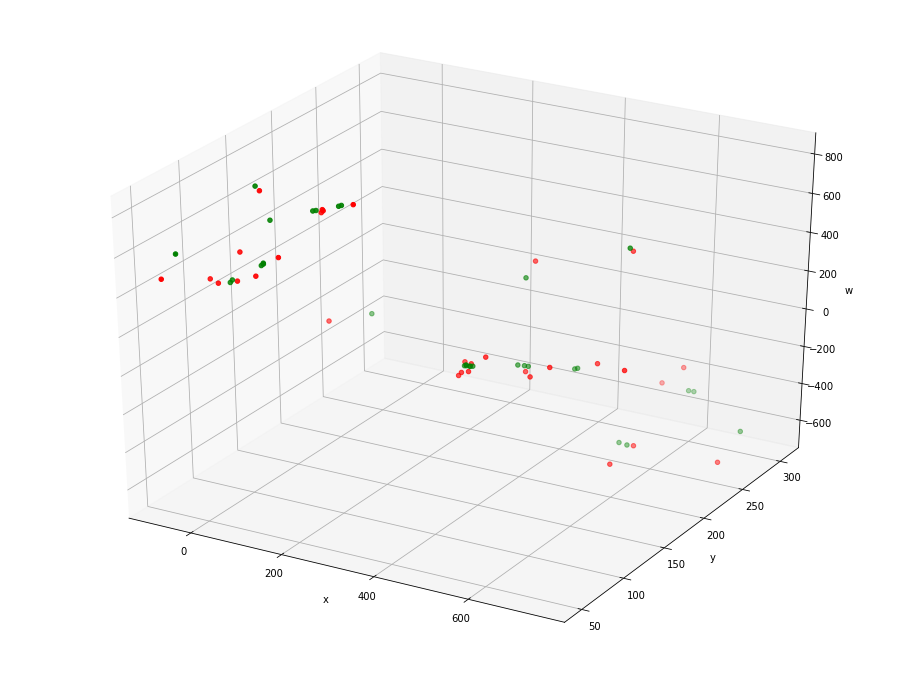

In [75]:
x = Y_test[:, 0]
y = Y_test[:, 1]
z = Y_test[:, 2]
x_pre_poly = Y_pred_poly[:, 0]
y_pre_poly = Y_pred_poly[:, 1]
z_pre_poly = Y_pred_poly[:, 2]

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c='r', marker='o')
ax.scatter(x_pre_poly, y_pre_poly, z_pre_poly, c='g', marker='o')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('w')

plt.show()

In [76]:
degree = 4  
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
model_poly_B_test = make_pipeline(poly_features, LinearRegression())

In [77]:
model_poly_B_test.fit(X_train, Y_train)

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=4, include_bias=False)),
                ('linearregression', LinearRegression())])

In [78]:
Y_pred_poly = model_poly_B_test.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred_poly)
r2 = r2_score(Y_test, Y_pred_poly)

print("Mean Squared Error of model B by polynomial fitting:", mse)
print("R^2 Score of model B by polynomial fitting:", r2)

Mean Squared Error of model B by polynomial fitting: 2533.6522709717947
R^2 Score of model B by polynomial fitting: 0.951503003545314
